In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from numpy.linalg import norm

from random import seed
from random import randint
from sklearn.metrics import accuracy_score

pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
    
seed(1)

np.set_printoptions(precision=10)

%precision 10
!cp -r /content/drive/MyDrive/CS_480_680_DataSets /content

'''
Format: there is one row per data instance and one column per attribute. 
The targets are real values.
The training set is already divided into 10 subsets for 10-fold cross validation.

'''

'\nFormat: there is one row per data instance and one column per attribute. \nThe targets are real values.\nThe training set is already divided into 10 subsets for 10-fold cross validation.\n\n'

In [2]:
# train.csv dataSet
train_1 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput1.csv', header=None)
train_2 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput2.csv', header=None)
train_3 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput3.csv', header=None)
train_4 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput4.csv', header=None)
train_5 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput5.csv', header=None)
train_6 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput6.csv', header=None)
train_7 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput7.csv', header=None)
train_8 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput8.csv', header=None)
train_9 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput9.csv', header=None)
train_10 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainInput10.csv', header=None)

# Labels dataSet
labels_1 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget1.csv', header=None)
labels_2 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget2.csv', header=None)
labels_3 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget3.csv', header=None)
labels_4 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget4.csv', header=None)
labels_5 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget5.csv', header=None)
labels_6 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget6.csv', header=None)
labels_7 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget7.csv', header=None)
labels_8 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget8.csv', header=None)
labels_9 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget9.csv', header=None)
labels_10 = pd.read_csv('/content/CS_480_680_DataSets/regression_dataset/trainTarget10.csv', header=None)

# Replace classes {'5' -> -1 and '6' -> 1}
replace_labels = {5: -1, 6: 1}
rename_features = {0: 'Label'}

labels_1.replace(replace_labels, inplace=True)
labels_2.replace(replace_labels, inplace=True)
labels_3.replace(replace_labels, inplace=True)
labels_4.replace(replace_labels, inplace=True)
labels_5.replace(replace_labels, inplace=True)
labels_6.replace(replace_labels, inplace=True)
labels_7.replace(replace_labels, inplace=True)
labels_8.replace(replace_labels, inplace=True)
labels_9.replace(replace_labels, inplace=True)
labels_10.replace(replace_labels, inplace=True)

labels_1.rename(columns=rename_features, inplace=True)
labels_2.rename(columns=rename_features, inplace=True)
labels_3.rename(columns=rename_features, inplace=True)
labels_4.rename(columns=rename_features, inplace=True)
labels_5.rename(columns=rename_features, inplace=True)
labels_6.rename(columns=rename_features, inplace=True)
labels_7.rename(columns=rename_features, inplace=True)
labels_8.rename(columns=rename_features, inplace=True)
labels_9.rename(columns=rename_features, inplace=True)
labels_10.rename(columns=rename_features, inplace=True)

In [3]:
train_set = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10]
labels_set = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_7, labels_8, labels_9, labels_10]

In [4]:
# K neighbors from 1 to 30 values sweep
lambda_values = np.arange(0.0, 4.1, 0.1)

# Number of trainingdata splits
k_cross = 10

# List of dataFrames of the training data execluding the training data used for validation 
training_data = []
training_labels = []

# Same for validation data
validation_data = []
validation_labels = []

# Get training data and validation data as list of dataFrames
for i in range(k_cross):
  sub_train = [train_set[index] for index in range(k_cross) if index != i]
  sub_label = [labels_set[index] for index in range(k_cross) if index != i]
  
  # Concatenate all dataframes in the sub_train list to a single dataframe in order
  # to get a single training examples dataFrame with all examples in it.
  training_data.append(pd.concat(sub_train, ignore_index=True))
  training_labels.append(pd.concat(sub_label, ignore_index=True))

  validation_data.append(train_set[i])
  validation_labels.append(labels_set[i])

In [5]:
def Get_Weights(tr_data, tr_labels, lambda_val):
  '''
  This function solves the equation (lambda * I + A) * W = b
  Where: Lambda is a given numeric value
  A: is the examples matrix with shape N examples * M features
  W: is the unknown matrix with shape M features * 1
  b: is the target matrix with shape N examples * 1
  '''
  # Get all features in the data frame; shape (N examples, M feature values)
  X_features = tr_data.to_numpy()
  Y_Labels = tr_labels.to_numpy()

  # Get number of examples
  Number_of_examples = X_features.shape[0]
  
  # W0, this is the free term in the equation: y = W0 + W1 * X1 + W2 * X2
  all_ones = np.reshape(np.ones(Number_of_examples), [Number_of_examples, 1])

  # Modify the features matrix (N examples, M feature values + 1)
  X_features_Modified = np.concatenate((all_ones, X_features), axis=1)
  
  # A matrix is (M feature values + 1, N examples) * ((N examples, M feature values + 1))
  A_mat = np.matmul(X_features_Modified.T, X_features_Modified)
  # Get lambda * Identity matrix
  I = np.identity(A_mat.shape[0]) * lambda_val

  # Calculate the left side in the equation: (lambda * Identity + A)
  first_term = (I + A_mat)
  # Calculate the right side in the equation: (b)
  b = np.matmul(X_features_Modified.T, Y_Labels)

  # Apply least square regression to get the weights
  w = np.linalg.lstsq(I, b, rcond = None)[0]
  first_term = np.linalg.inv(first_term)
  second_term = b
  w = np.matmul(first_term, second_term)
  
  return w

def Get_Estimate(weights, ts_data):
  # Get all features in the data frame; shape (N , M feature values)
  X_features = ts_data.to_numpy()

  # Get number of examples
  Number_of_examples = X_features.shape[0]
  
  # W0, this is the free term in the equation: y = W0 + W1 * X1 + W2 * X2
  all_ones = np.reshape(np.ones(Number_of_examples), [Number_of_examples, 1])

  # Modify the features matrix (N examples, M feature values + 1)
  X_features_Modified = np.concatenate((all_ones, X_features), axis=1)
  
  # Return the product of (N, M+1) * (M+1 * 1) = (N * 1)
  y_hat = np.dot(X_features_Modified, weights)
  return y_hat

In [6]:
y_estimate = []
accuracy = []
list_acc = []


# Select a certain k value for K neighbors
for lamb in lambda_values:
  # Use 10-fold cross validation
  accuracy = []
  for iter in range (k_cross):
    y_estimate = []
    # Loop over all examples in the current data setting

    # Get the estimate of the validation data to get accuracy
    tmp_weights = Get_Weights(training_data[iter], training_labels[iter], lamb)
    y_est = Get_Estimate(tmp_weights, validation_data[iter])
    loss = np.linalg.norm(y_est - validation_labels[iter].to_numpy())**2
    accuracy.append(loss)

  list_acc.append(np.sum(np.array(accuracy))/k_cross)

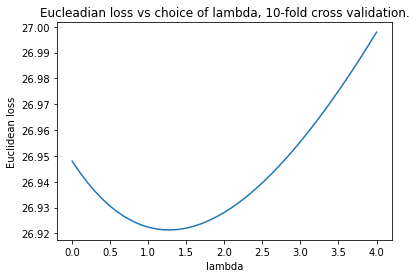

In [7]:
plt.title("Eucleadian loss vs choice of lambda, 10-fold cross validation.")
plt.xlabel("lambda")
plt.ylabel("Euclidean loss")
plt.plot(lambda_values, list_acc)
plt.show()

In [8]:
plot_me = {}
i = 0
for ind in list_acc:
  i += 1/10
  plot_me[i] = ind

  
ordered = {k: v for k, v in sorted(plot_me.items(), key=lambda item: item[1])}
plot_o = list(ordered.items())
print("Best lambda is at: ", plot_o[0][0], ", With Euclidean loss: ",  plot_o[0][1])

Best lambda is at:  1.4000000000000001 , With Euclidean loss:  26.921334161003433
